In [58]:
import pandas as pd
import os
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import streamlit as st
import seaborn as sns

In [2]:
raw_path = r"C:\Users\fagos\PycharmProjects\pythonProject\RealTime\data\raw"
sentiment_path = r"C:\Users\fagos\PycharmProjects\pythonProject\RealTime\data\sentiment"
tf_idf_path = r"C:\Users\fagos\PycharmProjects\pythonProject\RealTime\data\tfidf"

In [3]:
def read_parquet(directory):
    dataframes = []
    for file in os.listdir(directory):
        if file.endswith('.parquet'):
            file_path=os.path.join(directory, file)
            df = pd.read_parquet(file_path)
            dataframes.append(df)
    return pd.concat(dataframes)

In [4]:
raw_data = read_parquet(raw_path)
sentiment_data = read_parquet(sentiment_path)
tfidf_data = read_parquet(tf_idf_path)

I only need the sentiment data to make the visualizations

In [30]:
raw_data.head()

,id,author,created_utc,score,parent_id,subreddit,permalink,text,timestamp
0,l6yke7c,attaboy_stampy,1.717444e+09,2,t1_l6yk1cl,JoeRogan,/r/JoeRogan/comments/1d7cpts/what_do_you_guys_...,"That doesn't change what I said, just makes pa...",2024-06-03 21:53:52
1,l70uzie,QuietGuava,1.717479e+09,1,t1_l70no51,JoeRogan,/r/JoeRogan/comments/1d7cpts/what_do_you_guys_...,Its a played out phrase she didnt come up w.. ...,2024-06-04 07:21:43
0,l6z1cw9,deleted,1.717450e+09,1,t1_l6yrluu,JoeRogan,/r/JoeRogan/comments/1d7cpts/what_do_you_guys_...,[deleted],2024-06-03 23:29:19
1,l6zxooj,Nascent_Vagabond,1.717463e+09,-1,t1_l6yla62,JoeRogan,/r/JoeRogan/comments/1d7cpts/what_do_you_guys_...,People who question what is woke are the lefty...,2024-06-04 02:58:30
0,l70t9et,Neither_Stage_5095,1.717477e+09,1,t3_1d7cpts,JoeRogan,/r/JoeRogan/comments/1d7cpts/what_do_you_guys_...,"Oh my god. I’ve seen this post 20,000 times th...",2024-06-04 07:04:47


In [35]:
sentiment_data.head()

,id,author,created_utc,score,parent_id,subreddit,permalink,text,timestamp,finished_no_stop_lemmatized,finished_normalized,finished_tokenized,processed_text,compound,positive,neutral,negative
0,l7075o0,5chrodingers_pussy,1.717467e+09,0,t1_l6zzk27,JoeRogan,/r/JoeRogan/comments/1d7cpts/what_do_you_guys_...,You must be a very accomplished and interestin...,2024-06-04 04:04:13,"[must, accomplish, interest, person, judgement...","[you, must, be, a, very, accomplished, and, in...","[You, must, be, a, very, accomplished, and, in...",must accomplish interest person judgemental co...,0.8271,0.465,0.535,0.000
1,l703m1w,5chrodingers_pussy,1.717465e+09,1,t1_l6zy0t7,JoeRogan,/r/JoeRogan/comments/1d7cpts/what_do_you_guys_...,Why do good when there’s no reward. If i do wh...,2024-06-04 03:39:42,"[good, reward, im, good, someone, claim, credi...","[why, do, good, when, theres, no, reward, if, ...","[Why, do, good, when, there’s, no, reward, ., ...",good reward im good someone claim credit rewar...,0.9124,0.524,0.322,0.154
0,l6ypnwv,Financial_Exit7547,1.717446e+09,0,t1_l6ypibh,JoeRogan,/r/JoeRogan/comments/1d7cpts/what_do_you_guys_...,I’m not right leaning 😂😂😂😂😂😂,2024-06-03 22:22:45,"[im, right, lean]","[im, not, right, leaning]","[I’m, not, right, leaning, 😂😂😂😂😂😂]",im right lean,0.0000,0.000,1.000,0.000
1,l6yrbw5,poopdinkofficial,1.717447e+09,1,t1_l6ypr4a,JoeRogan,/r/JoeRogan/comments/1d7cpts/what_do_you_guys_...,You sure about that? 🤔,2024-06-03 22:32:18,[sure],"[you, sure, about, that]","[You, sure, about, that, ?, 🤔]",sure,0.3182,1.000,0.000,0.000
0,l6yg6to,StevenPlamondon,1.717443e+09,1,t3_1d7cpts,JoeRogan,/r/JoeRogan/comments/1d7cpts/what_do_you_guys_...,AI will do it ALL of it given enough time. But...,2024-06-03 21:30:38,"[ai, give, enough, time, yes, think, head, rig...","[ai, will, do, it, all, of, it, given, enough,...","[AI, will, do, it, ALL, of, it, given, enough,...",ai give enough time yes think head right space,0.4019,0.252,0.748,0.000


In [29]:
tfidf_data.head()

,word,tfidf,rank,window_start,window_end
0,it’s,0.0,1,2024-06-03 19:24:00,2024-06-03 19:25:00
1,eventually.,0.0,2,2024-06-03 19:24:00,2024-06-03 19:25:00
2,just,0.0,3,2024-06-03 19:24:00,2024-06-03 19:25:00
3,can’t,0.0,4,2024-06-03 19:24:00,2024-06-03 19:25:00
4,interact,0.0,5,2024-06-03 19:24:00,2024-06-03 19:25:00


In [48]:
all_data=pd.merge(sentiment_data, raw_data, how='left', on='id')
all_data.dropna(inplace=True)

# Drop duplicated columns if you only want to keep one set
columns_to_drop = ['author_x', 'created_utc_x', 'score_x', 'parent_id_x', 
                   'subreddit_x', 'permalink_x', 'text_x', 'timestamp_x']
all_data = all_data.drop(columns=columns_to_drop)
all_data = all_data.rename(columns={
    'author_y': 'author',
    'created_utc_y': 'created_utc',
    'score_y': 'score',
    'parent_id_y': 'parent_id',
    'subreddit_y': 'subreddit',
    'permalink_y': 'permalink',
    'text_y': 'text',
    'timestamp_y': 'timestamp'
})

all_data.columns

Index(['id', 'finished_no_stop_lemmatized', 'finished_normalized',
       'finished_tokenized', 'processed_text', 'compound', 'positive',
       'neutral', 'negative', 'author', 'created_utc', 'score', 'parent_id',
       'subreddit', 'permalink', 'text', 'timestamp'],
      dtype='object')

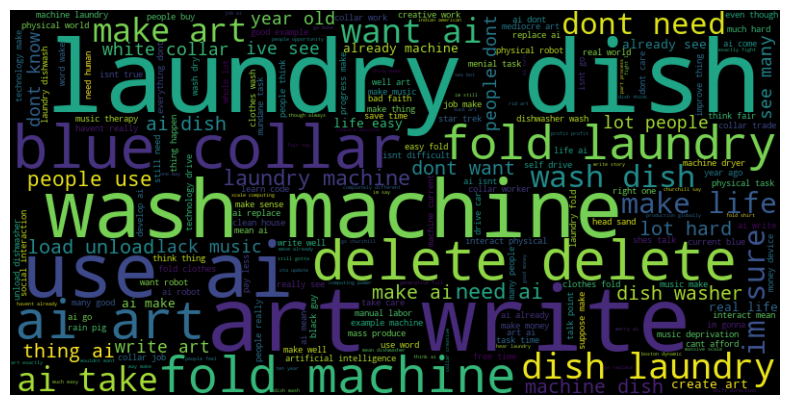

In [32]:
# Word Cloud

# Create a list of all the words
all_words = ' '.join([' '.join(text) for text in all_data['finished_no_stop_lemmatized']])

word_cloud = WordCloud(width=800, height=400, background_color='black').generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

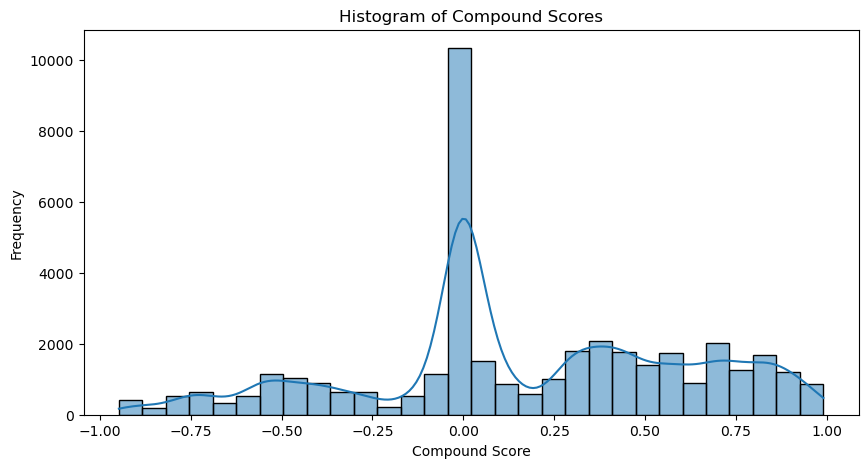

In [36]:
# Histogram of compound values

plt.figure(figsize=(10, 5))
sns.histplot(all_data['compound'], bins=30, kde=True)
plt.title('Histogram of Compound Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()

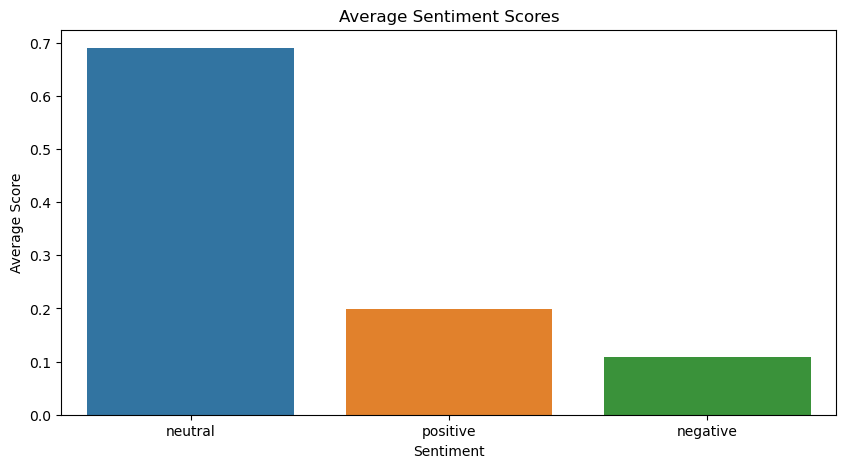

In [37]:
# Calculate mean values
sentiment_means = all_data[['neutral', 'positive', 'negative']].mean()

# Create the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=sentiment_means.index, y=sentiment_means.values)
plt.title('Average Sentiment Scores')
plt.xlabel('Sentiment')
plt.ylabel('Average Score')
plt.show()

                 hour  compound
0 2024-06-03 21:00:00  0.095737
1 2024-06-03 22:00:00  0.078994
2 2024-06-03 23:00:00  0.095380
3 2024-06-04 00:00:00  0.201078
4 2024-06-04 01:00:00  0.243584
hour        datetime64[ns]
compound           float64
dtype: object


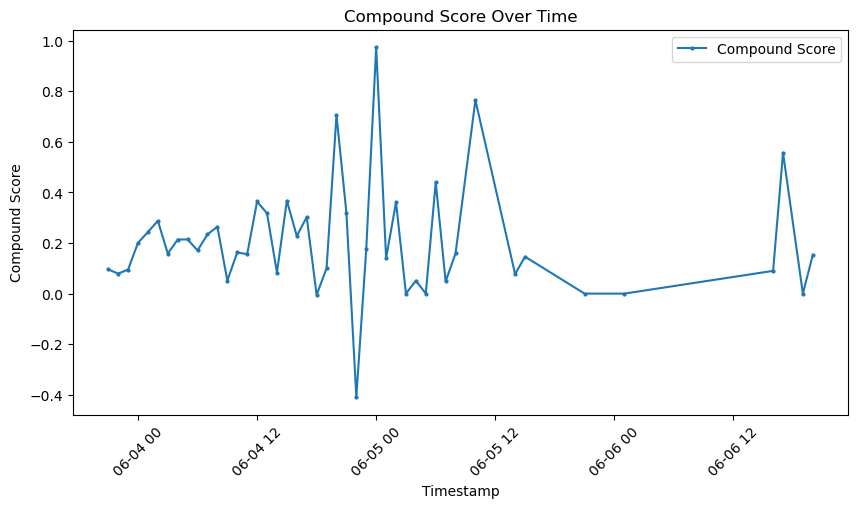

In [56]:
# Create a copy of the DataFrame for visualization
vis_data = all_data.copy()

# Convert the timestamp column to datetime
vis_data['timestamp'] = pd.to_datetime(vis_data['timestamp'])

# Drop rows with NaN values in the compound column
vis_data = vis_data.dropna(subset=['compound'])

# Sort the DataFrame by timestamp
vis_data = vis_data.sort_values('timestamp')

# Extract the hour from the timestamp for grouping
vis_data['hour'] = vis_data['timestamp'].dt.floor('H')

# Group by the hour and calculate the mean compound score
grouped_data = vis_data.groupby('hour')['compound'].mean().reset_index()

# Print the grouped data for debugging purposes
print(grouped_data.head())
print(grouped_data.dtypes)

# Create the line chart with grouped data
plt.figure(figsize=(10, 5))
plt.plot(grouped_data['hour'], grouped_data['compound'], marker='o', linestyle='-', markersize=2, label='Compound Score')
plt.title('Compound Score Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Compound Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()

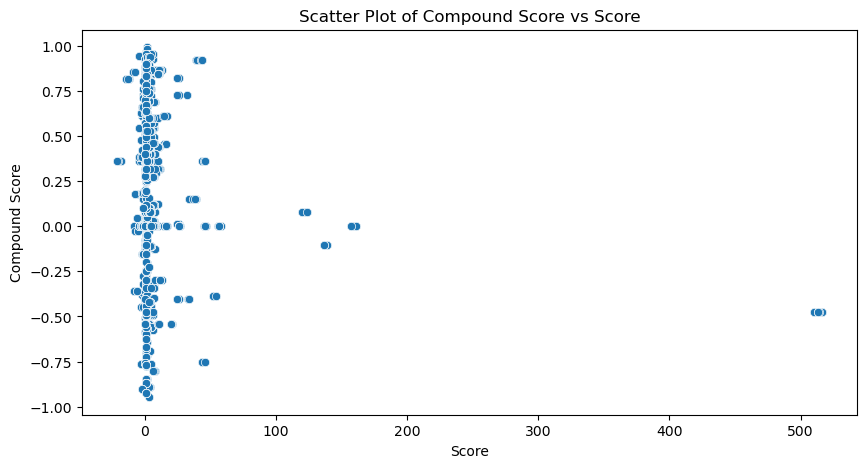

In [40]:
# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='score', y='compound', data=all_data)
plt.title('Scatter Plot of Compound Score vs Score')
plt.xlabel('Score')
plt.ylabel('Compound Score')
plt.show()